<a href="https://colab.research.google.com/github/senasung37/startup_project/blob/main/%EA%B8%B0%EC%97%85%ED%98%91%EC%97%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_NLP_clustering(%EB%B3%B4%EC%95%88%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연습 - 문장 클러스터링(예제코드)


출처: http://ai.intelligentonlinetools.com/ml/text-clustering-word-embedding-machine-learning/

In [ ]:
#라이브러리
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

In [ ]:
#문장 지정
  
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]

In [ ]:
#W2V 모델 정의
model = Word2Vec(sentences, min_count=1) 

In [ ]:
#문장 벡터라이징 함수
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
#문장 벡터라이징
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X[:1])

[array([ 4.22335230e-04,  1.34081522e-03,  1.51203421e-03,  7.49444589e-04,
        7.11252971e-04,  7.96128064e-04, -7.69776234e-04,  8.50202050e-05,
       -6.49364607e-04, -1.17169635e-03,  1.07763553e-05,  8.75554222e-04,
       -1.07091805e-03,  9.75284784e-05, -1.62716652e-03, -1.25068519e-03,
        2.21658382e-03,  8.95523932e-04, -5.90118929e-04,  7.35550886e-04,
       -1.53736176e-03, -1.06111448e-03,  6.29408052e-04,  7.24883634e-04,
        8.19462235e-04, -5.79414307e-04,  6.94015471e-04,  7.89344951e-04,
       -2.66387360e-04, -3.85194609e-04,  1.90899218e-03,  1.09471777e-03,
        6.10683346e-04,  9.22914827e-04,  1.00167084e-03, -7.43455719e-04,
        6.22827793e-06, -2.22134258e-04, -1.67627819e-03,  7.94408144e-04,
       -1.94801111e-03, -3.91854934e-04, -1.58092938e-03, -2.48281402e-04,
       -1.32115369e-04, -6.39961218e-05,  9.84303479e-05, -1.04074890e-04,
       -9.92374960e-04, -8.69148294e-04, -8.37201951e-04, -1.68010942e-04,
       -2.37286137e-03, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#학습된 단어들 
model[model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.00298488, -0.00128519, -0.00301728, ..., -0.00218208,
        -0.00054142, -0.00185534],
       [ 0.00416208, -0.00208638,  0.00172799, ..., -0.00444552,
         0.00340385,  0.00159922],
       [-0.00230799,  0.00395291,  0.00193293, ..., -0.00424606,
        -0.00174516,  0.00335915],
       ...,
       [-0.00087914, -0.00240731, -0.00168118, ..., -0.00030314,
        -0.00340994, -0.00404176],
       [-0.00105712,  0.00161719,  0.00407521, ...,  0.00179846,
        -0.0034688 ,  0.00314918],
       [-0.00278155,  0.00146799, -0.0030823 , ..., -0.00402959,
        -0.00440742,  0.00471786]], dtype=float32)

In [ ]:
#단어간 유사도 평가(코싸인 유사도)
print (model.similarity('this', 'more'))


0.17969936


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [ ]:
#유사한 단어 불러오기(the top-N most similar words)
print(model.most_similar(positive=['machine'], negative=[], topn=5))

[('the', 0.14324241876602173), ('is', 0.13412363827228546), ('book', 0.07909297943115234), ('and', 0.06448584049940109), ('yesterday', 0.05565278232097626)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
#클러스터링
NUM_CLUSTERS = 2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)   
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))    
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

[0, 0, 0, 1, 1, 1, 0, 0, 0]
0:['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0:['this', 'is', 'another', 'book']
0:['one', 'more', 'book']
1:['weather', 'rain', 'snow']
1:['yesterday', 'weather', 'snow']
1:['forecast', 'tomorrow', 'rain', 'snow']
0:['this', 'is', 'the', 'new', 'post']
0:['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0:['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


KMeans(n_clusters=2)

In [ ]:
#클러스터링 결과
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("-----------")
print ("Centroids data")
print (centroids)
print ("-----------")  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Cluster id labels for inputted data
[0 0 0 1 1 1 0 0 0]
-----------
Centroids data
[[ 8.25143899e-04  7.49211880e-04  4.54755626e-04  9.66598474e-04
   9.50359908e-04  9.35498800e-04 -3.74869060e-04 -3.51164116e-04
  -1.01414505e-03 -6.51872523e-04 -7.62606870e-04  1.27300408e-03
  -7.01283415e-04  1.49123878e-04 -1.78678056e-03 -3.20157812e-04
   1.94064775e-03  1.14008045e-03 -3.93957928e-04  8.52916455e-05
  -4.19100436e-04 -2.94224117e-04  5.71989998e-04  1.94579392e-03
   1.04608934e-03 -4.70010224e-04 -4.13823480e-04  7.96168515e-05
  -3.97419302e-04  5.99869207e-04  3.15562817e-04  1.11895807e-03
   7.31984280e-04  1.03162701e-03  1.69155438e-03  1.25847514e-04
   3.73249175e-04 -1.41616392e-04 -1.98193503e-03  2.57240807e-04
  -2.09249667e-03 -8.78910551e-04 -1.24395350e-03  3.10823792e-04
  -6.15458302e-04  3.81570305e-04  1.12606009e-04  4.73988184e-05
  -7.51264199e-04 -4.19704045e-04 -3.98436013e-04 -1.43950912e-04
  -1.76378418e-03  4.85949075e-04  1.59390926e-04  3.279089

In [ ]:
#실루엣 점수 평가(클러스터링 평가: -1~1)
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score) 

Silhouette_score: 
0.2872368


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0 ['this', 'is', 'another', 'book']
0 ['one', 'more', 'book']
1 ['weather', 'rain', 'snow']
1 ['yesterday', 'weather', 'snow']
1 ['forecast', 'tomorrow', 'rain', 'snow']
0 ['this', 'is', 'the', 'new', 'post']
0 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


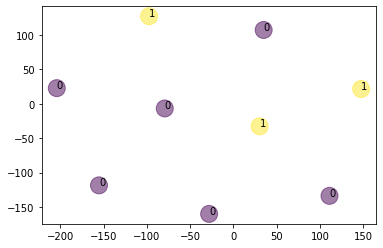

In [ ]:
#클러스터링 시각화
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
  
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
  
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
plt.show()

#프로젝트 - 페이워크 데이터에 적용

In [ ]:
#라이브러리
import pandas as pd
import requests
import numpy as np

#nlp 라이브러리
import re
import nltk
import spacy
from spacy.tokenizer import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

#w2v, kmeans 라이브러리
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer  
from sklearn import cluster
from sklearn import metrics

In [ ]:
# 견적서 파일 df로 불러오기
df = pd.read_excel('견적서_변형.xlsx')
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,메모,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,NaN,NaN,NaN,NaN
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,NaN,NaN,NaN,NaN
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[:, :10]
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드


In [ ]:
#테스트 행 삭제
df = df[df["분류"].str.contains('테스트') == False]

In [ ]:
#함수-특수기호, 공백제거
def clean_text(texts):
  #remove punctuation 
  new_text = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts))

  #remove number
  new_text = re.sub(r'\d+','', str(new_text))
  #remove extra space
  new_text = re.sub(r'\s+', ' ',new_text) 
  #remove spaces
  new_text = re.sub(r'\s+', ' ', new_text) 
  #remove space from start
  new_text = re.sub(r"^\s+", '', new_text) 
  #remove space from the end  
  new_text = re.sub(r'\s+$', '', new_text) 
  #lower case 
  new_text = new_text.lower() 
  #remove Html tags 
  #new_text = re.sub(r'<[^>]+>', '', new_text) 
  return new_text

In [ ]:
#데이터 클리닝
df['clean_text'] = df['항목명'].apply(clean_text)

In [ ]:
#라이브러리 설치 및 import
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git
from pykospacing import Spacing
from hanspell import spell_checker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-hrhhypzp
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-hrhhypzp
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-8y3q57ig
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-8y3q57ig


In [ ]:
#함수 - hanspell 맞춤법 수정 
def han_spell_check(x):
  x = x.strip()
  res = spell_checker.check(x)
  result = res.checked
  return result

In [ ]:
#hanspell 적용
df['clen_text_hansp'] = df['clean_text'].apply(han_spell_check)

In [ ]:
#pykospacing 모델설정
spacing = Spacing()

In [ ]:
#pykospacing 적용
df['clean_text_pyko'] = df['clen_text_hansp'].apply(spacing)

In [ ]:
#W2V 모델 정의
model = Word2Vec(sentences, min_count=1)
   
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
sentences = df["clean_text_pyko"]

In [ ]:
#학습
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
#클러스터링
NUM_CLUSTERS = 6
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)   
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

In [ ]:
#클러스터링 결과
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("-----------")
print ("Centroids data")
print (centroids)
print ("-----------")  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

In [ ]:
#평가
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score) 

In [ ]:
#클러스터링 시각화
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
  
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
  
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
plt.show()

In [ ]:
#기존 NLP df에 열로 추가
df['cluster_num'] = assigned_clusters
df

In [ ]:
#파일 내보내기
df.to_excel('견적서_cluster.xlsx')